In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score,auc
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [2]:
x, y = fetch_openml(name="Fashion-MNIST", as_frame=False, return_X_y=True)
y = y.astype(int)

#test data 20% of our data (X_te, y_te) 
X_te, X_temp, y_te, y_temp = train_test_split(x, y, test_size=0.8, shuffle=True)
#training/validation data (X_tr, X_val, y_tr, y_val)
X_tr, X_val, y_tr, y_val = train_test_split(X_temp, y_temp, test_size=0.25, shuffle=True)
scaler = StandardScaler()
scaler.fit(X_tr)
X_val = scaler.transform(X_val)
X_tr = scaler.transform(X_tr)
X_te = scaler.transform(X_te)

In [3]:
knn_model = KNeighborsClassifier(n_neighbors=10)

In [4]:
nn_model  = MLPClassifier(activation = "relu",learning_rate = "invscaling",hidden_layer_sizes = (400, 200,100,50,),verbose=3)

In [5]:
logistic_model = LogisticRegression(solver = 'newton-cg',C=10, max_iter=10, penalty= 'l2')

In [6]:
rf_model = RandomForestClassifier(n_estimators = 100, min_samples_split = 10, min_samples_leaf = 2, max_features = "log2", max_depth = 100, criterion = "log_loss",verbose=3)

In [7]:
classifiers = [knn_model,logistic_model,nn_model,rf_model]
classifier_names = ['KNN', 'Logistic', 'Neural Network', 'Random Forest']

In [8]:
#fit all classifers on training data:
for classifier in classifiers:
    print(classifier)
    classifier.fit(X_tr,y_tr)

KNeighborsClassifier(n_neighbors=10)
LogisticRegression(C=10, max_iter=10, solver='newton-cg')


/opt/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(400, 200, 100, 50),
              learning_rate='invscaling', verbose=3)
Iteration 1, loss = 0.49676453
Iteration 2, loss = 0.34198016
Iteration 3, loss = 0.29513376
Iteration 4, loss = 0.27096299
Iteration 5, loss = 0.23791498
Iteration 6, loss = 0.21901676
Iteration 7, loss = 0.20002845
Iteration 8, loss = 0.18552612
Iteration 9, loss = 0.17584118
Iteration 10, loss = 0.15807029
Iteration 11, loss = 0.14652792
Iteration 12, loss = 0.13650495
Iteration 13, loss = 0.12303671
Iteration 14, loss = 0.11511695
Iteration 15, loss = 0.10165470
Iteration 16, loss = 0.10263649
Iteration 17, loss = 0.09499763
Iteration 18, loss = 0.08658980
Iteration 19, loss = 0.08214027
Iteration 20, loss = 0.07988590
Iteration 21, loss = 0.07043965
Iteration 22, loss = 0.08908703
Iteration 23, loss = 0.06604882
Iteration 24, loss = 0.05624491
Iteration 25, loss = 0.05452252
Iteration 26, loss = 0.05985554
Iteration 27, loss = 0.06463992
Iteration 28, loss = 0.04352246
Iterat

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   24.2s finished


Sklearn Results:
--- Accuracy on KNN (train): 0.8717142857142857
--- Accuracy on KNN (test): 0.8481428571428572
Sklearn Results:
--- Accuracy on Logistic (train): 0.8851428571428571
--- Accuracy on Logistic (test): 0.8465714285714285
Sklearn Results:
--- Accuracy on Neural Network (train): 0.9923095238095239
--- Accuracy on Neural Network (test): 0.8887857142857143


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


Sklearn Results:
--- Accuracy on Random Forest (train): 0.9836666666666667
--- Accuracy on Random Forest (test): 0.8710714285714286


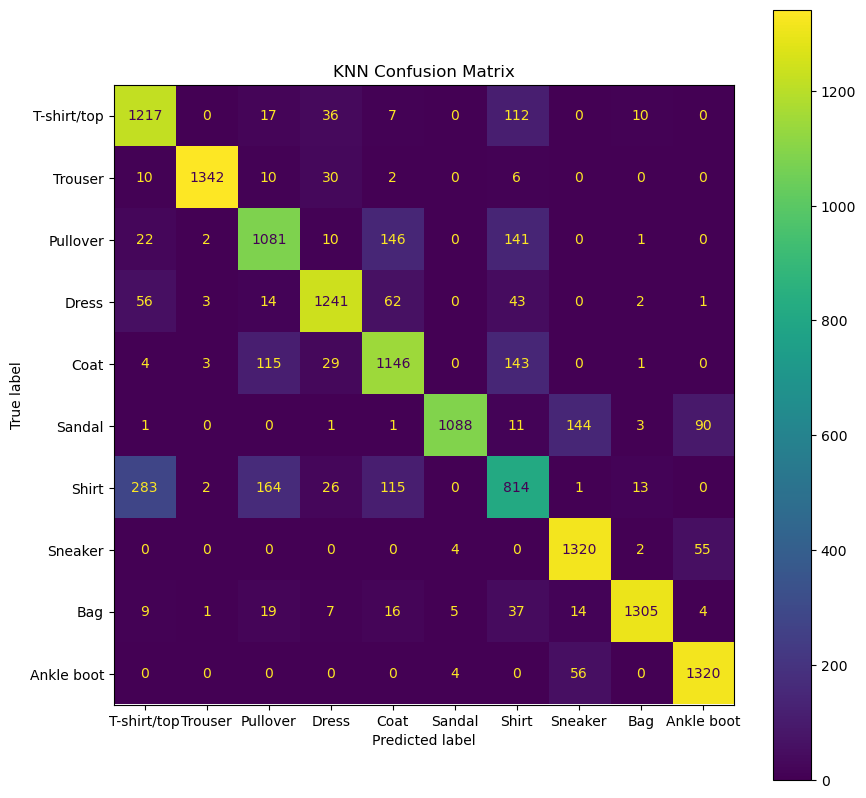

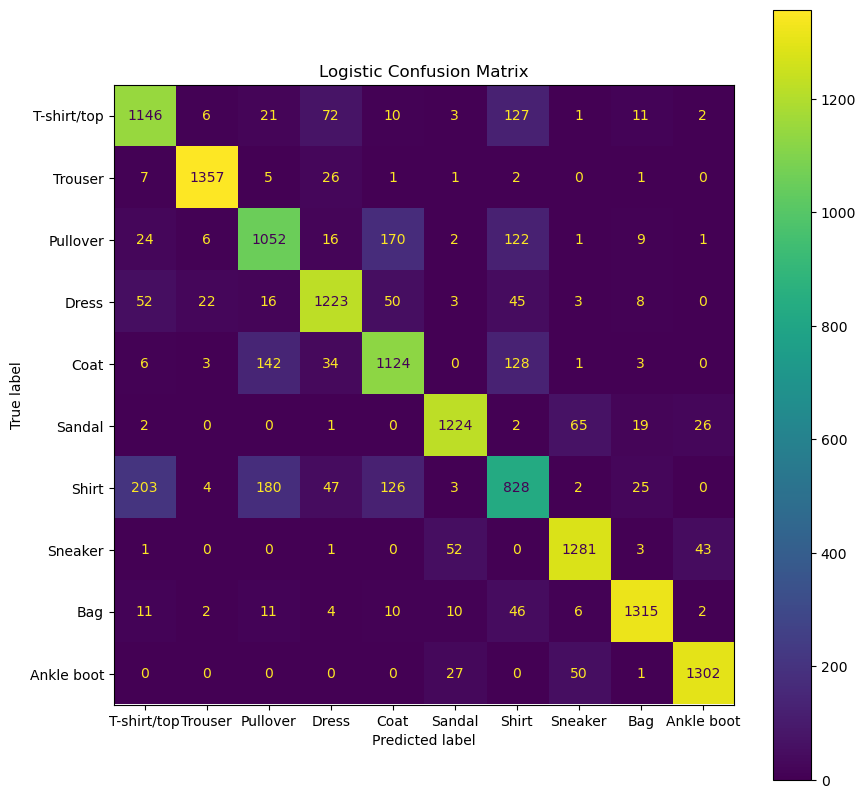

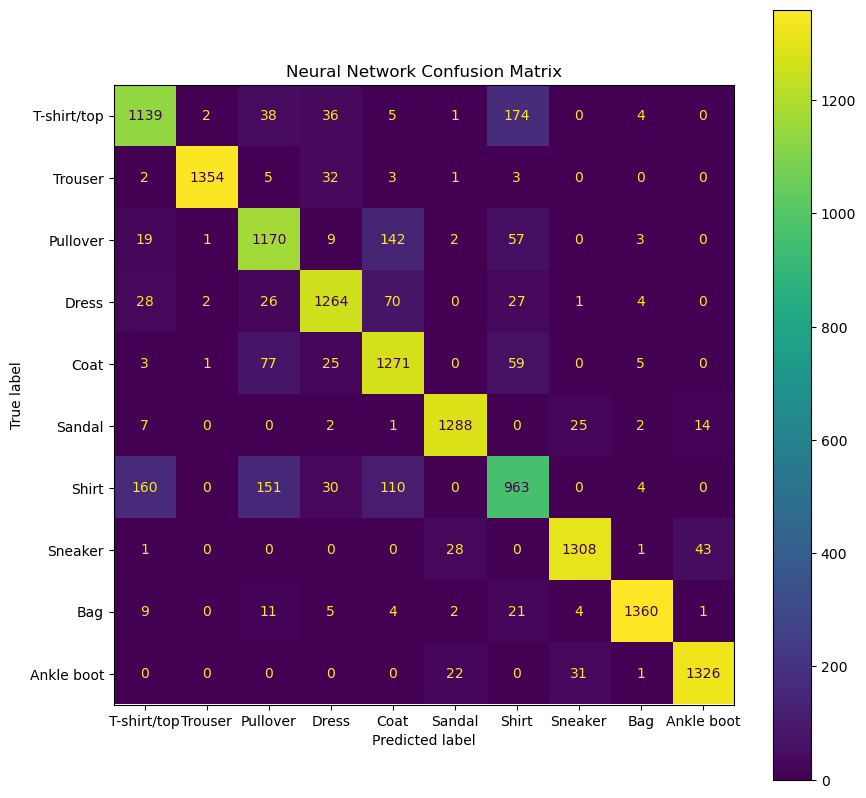

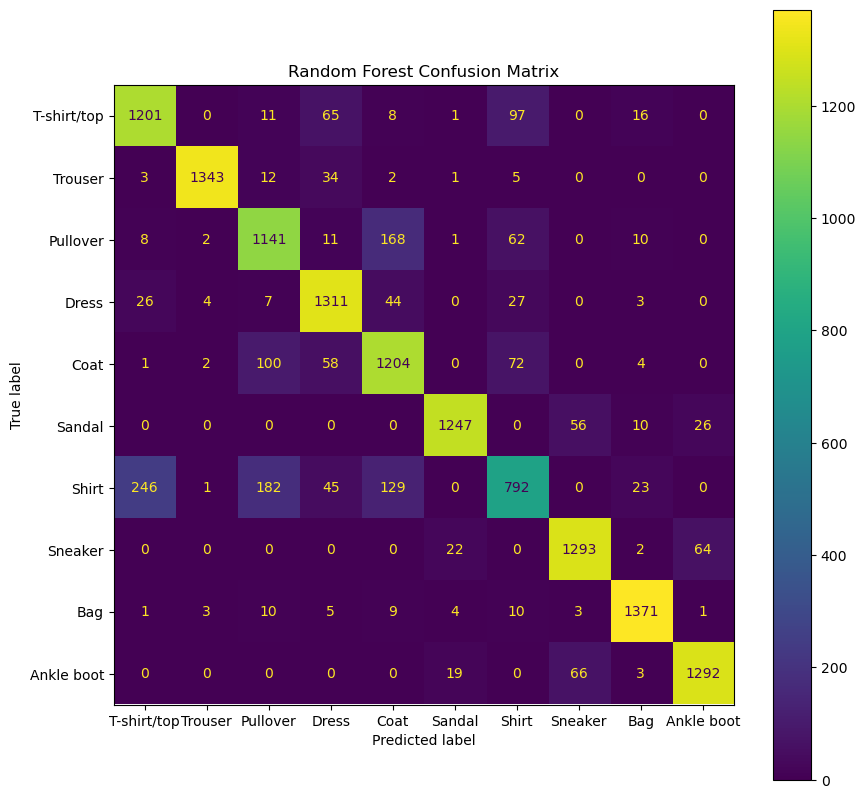

In [12]:
cm_lst = []
for i, classifier in enumerate(classifiers):
    # Make predictions on training and testing data
    sklearn_y_pred_tr = classifier.predict(X_tr)
    sklearn_y_pred_te = classifier.predict(X_te)

    # Evaluate accuracies using the sklearn function accuracy_score
    sklearn_acc_tr = accuracy_score(y_tr, sklearn_y_pred_tr)
    sklearn_acc_te = accuracy_score(y_te, sklearn_y_pred_te)

    print(f'Sklearn Results:')
    print(f'--- Accuracy on {classifier_names[i]} (train): {sklearn_acc_tr}')
    print(f'--- Accuracy on {classifier_names[i]} (test): {sklearn_acc_te}')

    # Evaluate confusion matrix using the sklearn function confusion_matrix
    labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
    sklearn_cm = confusion_matrix(y_te, sklearn_y_pred_te)
    cm_lst.append(sklearn_cm)
    sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm, display_labels = labels)
    fig, ax = plt.subplots(figsize = (10,10))
    ax.set_title(f"{classifier_names[i]} Confusion Matrix")
    sklearn_disp.plot(ax=ax);



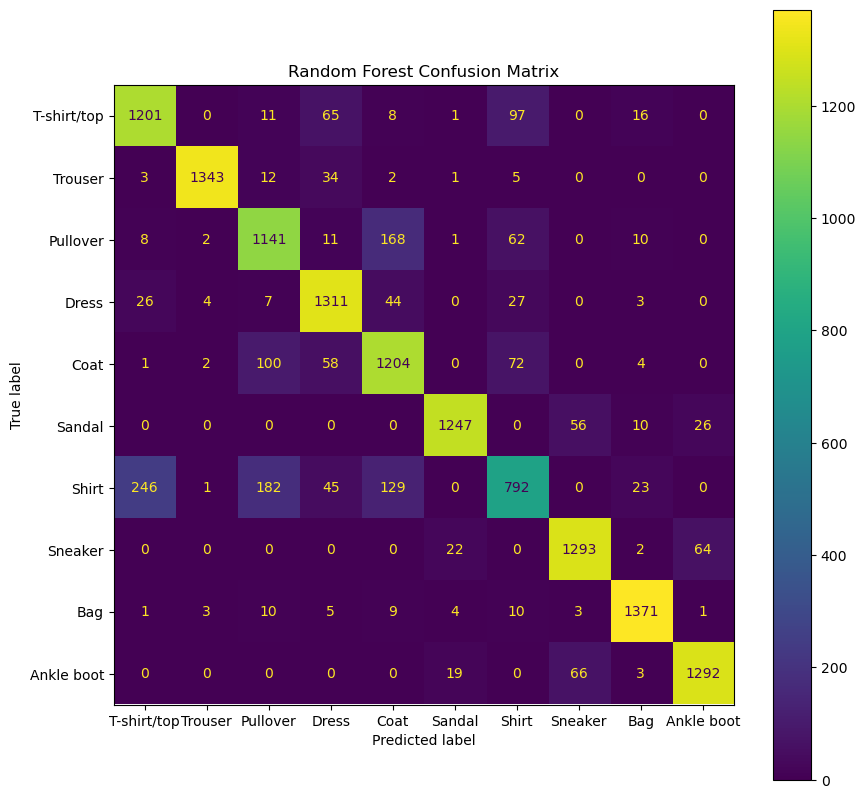

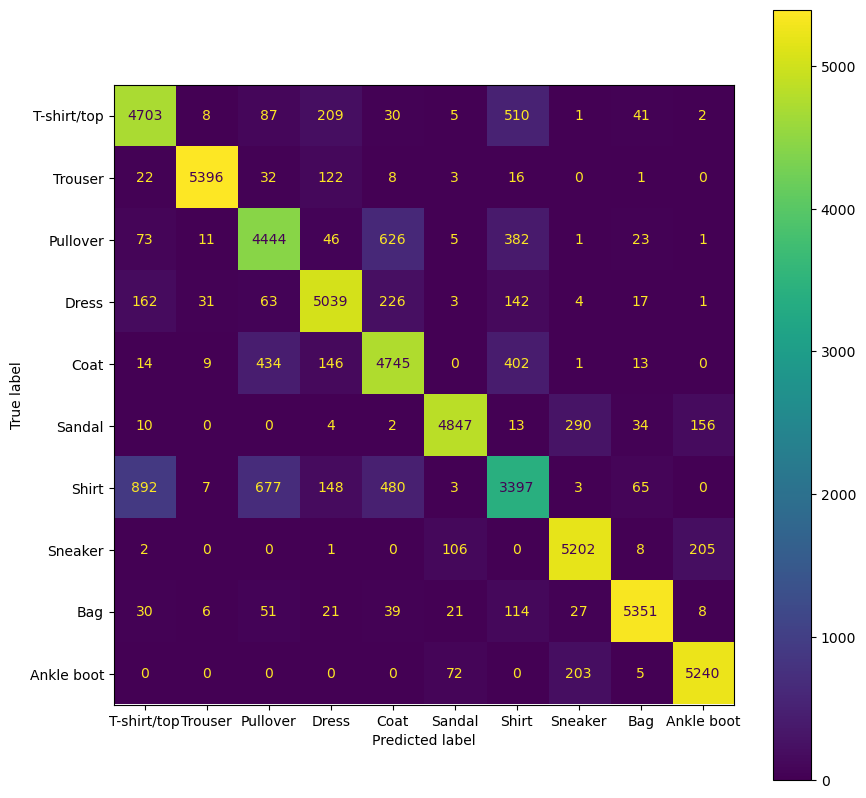

In [11]:
knn, lc, nn, rf = cm_lst
total_cm = np.add(knn, lc) 
total_cm2 =  np.add(total_cm,nn)
total_cm3 =  np.add(total_cm2, rf)
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = total_cm3, display_labels = labels)
fig, ax = plt.subplots(figsize = (10,10))
sklearn_disp.plot(ax=ax);
